<center><h1 style='color:blue'>Atelier 2: Apprentissage supervisé avec Python</h1></center>

* Data Preprocessing (données hétérogènes, données manquantes, etc.)
* Feature engineering
* Feature selection
* Classification
* Evaluation de la qualité d'un classifieur


In [ ]:
# Importations des packages
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
warnings.filterwarnings("ignore")

In [ ]:
def display_confusion_matrix(Y_test, y_pred):
    """
        Display Confusion Matrix given y_test and y_pred 
    """
    confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
    cm_display.plot()
    plt.show()

def model_trainer(X_train, Y_train, X_test, Y_test):
    # instanciation d'un modèle d'arbre de décision   
    m_tree = DecisionTreeClassifier() 

    # instanciation d'un modèle de KNN 
    m_knn = KNeighborsClassifier(n_neighbors=5)

    # instanciation d'un modèle de MLP 
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)
    
    m_tree.fit(X_train, Y_train)
    m_knn.fit(X_train, Y_train)
    mlp_classifier.fit(X_train, Y_train)
    y_pred_cart = m_tree.predict(X_test)
    y_pred_knn  = m_knn.predict(X_test)
    y_pred_mlp  = mlp_classifier.predict(X_test)
    
    accuracy_cart = metrics.accuracy_score(Y_test, y_pred_cart)
    precision_cart = metrics.precision_score(Y_test, y_pred_cart) 

    accuracy_knn = metrics.accuracy_score(Y_test, y_pred_knn)
    precision_knn = metrics.precision_score(Y_test, y_pred_knn)

    accuracy_mlp = metrics.accuracy_score(Y_test, y_pred_mlp)
    precision_mlp = metrics.precision_score(Y_test, y_pred_mlp)

    labels = ['cart', 'knn', 'mlp']
    prec_scores = [precision_cart, precision_knn, precision_mlp]
    acc_scores = [accuracy_cart, accuracy_knn, accuracy_mlp]
    d = {'classifier': labels, 'Precision': prec_scores, 'Accuracy': acc_scores}
    df = pd.DataFrame(d)
    
    return df

class FeatureSelection:
    """
        Class For feature selection with random forest
    """
    def __init__(self, model):
        self.clf = RandomForestClassifier(n_estimators=100)
        self.model = model
        self.importances = None
        self.sorted_idx = None
        self.nbr_features_selected = None
    def fit(self, X, Y):
        self.clf.fit(X, Y)
        self.importances=self.clf.feature_importances_
        self.sorted_idx = np.argsort(self.importances)[::-1]
        scores=np.zeros(X.shape[1]+1)
        for f in np.arange(0, X.shape[1]+1):
            X1_f = X_train[:,sorted_idx[:f+1]]
            X2_f = X_test[:,sorted_idx[:f+1]]
            self.model.fit(X1_f,Y_train)
            Y_mlp=self.model.predict(X2_f)
            scores[f]=np.round(metrics.accuracy_score(Y_test,Y_mlp),3)
        self.nbr_features_selected = np.argmax(scores) 
        
    def transform(self, X):
        return  X[:,self.sorted_idx[:7+1]]

<h2> I- Apprentissage supervisé: Feature engineering et classification</h2>

 * MLP
    * Normalisation 
    * 7 variables

### 1- Chargement des données et préparation

* base de données credit_scoring.csv: évaluation de la solvabilité d'un client souhaitant souscrire à un credit.

In [ ]:
# Importation des données
data = pd.read_csv('./credit_scoring.csv', sep=';')

In [ ]:
# Afiche les 5 premiers records
data.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [ ]:
print(data.shape[0])

4375


<strong style="color:red">Description de nos données</strong>:

* Nombres de caractéristiques (Features) est de 13 et sont : Seniority, Home, Time, Age, Marital, Records, Job, Expense, Income, Assets, Debt, Amount, Price, Status. 
* Nombres d'observations est de 4375
* Observations avec status = 1: 1216
* Observations avec status = 1: 3159


In [ ]:
# Transformation en numpy du jeu de données issue de data 
X = data.iloc[:,:].values

In [ ]:
# Separation des caractérisques (X_data) et la variable à prédire (Y_data)   
X_data = X[:, :-1]
Y_data = X[:, -1]

In [ ]:
# Analyse des propriétés de la data set
n_neg = sum(Y_data >= 1 )
n_pos = sum(Y_data <= 0)
print(f'Shape X_data: {X_data.shape} \nShape Y_data: {Y_data.shape}')
print(f'nombre des éléments positifs: {n_pos}')
print(f'nombre des éléments négatifs: {n_neg}')

Shape X_data: (4375, 13) 
Shape Y_data: (4375,)
nombre des éléments positifs: 1216
nombre des éléments négatifs: 3159


(array([1216., 3159.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

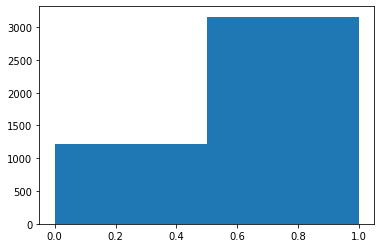

In [ ]:
# Histogramme
plt.hist(Y_data, bins=2)

<hr style="background:blue;height:5px;">

### 2-  Apprentissage et évaluation de modèles

In [ ]:
# training and test data sans aucun pretraitement (feature engineering, )
X_data = X[:, :-1]
Y_data = X[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size=0.5, random_state=1)

In [ ]:
df = model_trainer(X_train,Y_train, X_test, Y_test)

In [ ]:
# Accuracy et Précision des modèles
df.head(10).style.hide_index()

classifier,Precision,Accuracy
cart,0.823757,0.734461
knn,0.770971,0.724863
mlp,0.800323,0.615631


--- 
 <h4>Le meilleur critère est <strong style="color:green"> Précision </strong>. En effet la précision est le pourcentage des vraies positifs (True positifs). Dans ce cas s'il s'agit de la portion des personnes ayant réellement un score 1 parmi celles predites avec un score 1 . Le meilleur critère est celui qui minimise les faux positifs donc la precision. <strong style="color:red">Rappel</strong>(Recall) nous donne le pourcentage de personnes ayant un score de 1 et qui ont été predites comme telles. Le recall ne minimise pasles faux positifs, mais plutot les faux negatifs. </h4>       
 
---

<strong style="color:red">Note</strong>: On remarque que l'arbre de décision cart à la meilleure précision et que le KNN est à le meilleur accuracy.

<hr style="background:blue;height:5px;">

### 3- Normalisation des variables continues

### a- Standardisation 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size=0.5, random_state=1)
min_obj = StandardScaler().fit(X_train)
X_train = min_obj.transform(X_train)
X_test =min_obj.transform(X_test)

In [ ]:
df = model_trainer(X_train,Y_train, X_test, Y_test)

In [ ]:
df.head(10).style.hide_index()

classifier,Precision,Accuracy
cart,0.819855,0.720750
knn,0.810602,0.752742
mlp,0.838172,0.776508


<strong style="color:red">Note</strong>: Après avoir fait la standardisation, on constate est une amélioration de la precision et de l'accuracy au niveau de trois modèles. Le modèle mlp a surpassé les autres en accuracy et precision. Donc la standardisation a eu un effet notoire sur la precision et l'accuracy de ce modèle.     

### b- Normalisation

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size=0.5, random_state=1)
min_obj = MinMaxScaler().fit(X_train)
X_train = min_obj.transform(X_train)
X_test =min_obj.transform(X_test)

In [ ]:
df = model_trainer(X_train,Y_train, X_test, Y_test)

In [ ]:
df.head(10).style.hide_index()

classifier,Precision,Accuracy
cart,0.815891,0.723035
knn,0.807669,0.745430
mlp,0.832346,0.788848


<strong style="color:red">Note</strong>: La normalisation a amélioré legèrement la precision et l'accuracy du modèle MLP. Elle permet de reduire le biais présent dans les données.   

<hr style="background:blue;height:5px;">

### 4- Création de nouvelles caractérisques par PCA 

In [ ]:
pca = PCA(n_components=3)
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size=0.5, random_state=1)
pca.fit(X_train)

X_pca = pca.transform(X_train)
X_train = np.concatenate((X_train, X_pca), axis=1)

X_pca = pca.transform(X_test)
X_test = np.concatenate((X_test, X_pca), axis=1)

In [ ]:
df = model_trainer(X_train,Y_train, X_test, Y_test)

In [ ]:
df.head(10).style.hide_index()

classifier,Precision,Accuracy
cart,0.813676,0.733090
knn,0.766885,0.723949
mlp,0.742815,0.731718


<strong style="color:red">Note</strong>: La création de features avec PCA a été contre-productif car elle entraîne une dimunition de la precision et de l'accuracy.  

---
<h4 style="color:red"> le meilleur algorithme parmi les trois est <strong style="color:green">__MLP__ </strong>, et le meilleur traitement à faire sur les données est la <strong style="color:green">Normalisation</strong> (MinMAX).    </h4> 

---

<hr style="background:blue;height:5px;">

### 5- Selection de variables (features selection)

---
L'utilisation d'un RandomForest permet d'évaluer la pertinence (importance) des variables. Cela permettra de reduire leur nombre, en selectionnant que celles ayant une importance significatives.  

---

In [ ]:
# Normalisation de données
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size=0.5, random_state=1)
min_obj = MinMaxScaler().fit(X_train)
X_train = min_obj.transform(X_train)
X_test = min_obj.transform(X_test)
print(X_train.shape)

(2187, 13)


Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


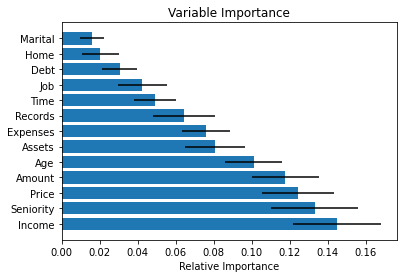

In [ ]:
# Affichage de l'importance de chaque de  caractéristique
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features =data.columns
print(features[sorted_idx])
padding = np.arange(X_train.size/len(X_train)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

---
Après avoir appliqué le Random Forest on remarque que les variables Income et seniority sont les plus importantes et que les moins importantes sont Marital et Home   

---

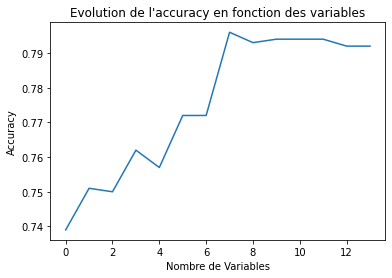

In [ ]:
# Selection de caractéristique et entrainement du modèle mlp
mlp_classifier = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)
scores=np.zeros(X_train.shape[1]+1)
for f in np.arange(0, X_train.shape[1]+1):
    X1_f = X_train[:,sorted_idx[:f+1]]
    X2_f = X_test[:,sorted_idx[:f+1]]
    mlp_classifier.fit(X1_f,Y_train)
    Y_mlp=mlp_classifier.predict(X2_f)
    scores[f]=np.round(metrics.accuracy_score(Y_test,Y_mlp),3)

plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

---
En utilisant 7 variables ('Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',) on obtient le meilleur accuracy avec le modèle mlp.

---

<hr style="background:blue;height:5px;">

### 6- Paramétrage des classifieurs

---
Dans cette partie, l'algorithme GridSearchCV a été utilisé pour chercher les meilleurs hyparametres qui donnent le meilleur accuracy 

---

In [ ]:
X1_f = X_train[:,sorted_idx[:7+1]]
X2_f = X_test[:,sorted_idx[:7+1]]

mlp_classifier = MLPClassifier(hidden_layer_sizes=(70, 20), random_state=1)
mlp_classifier.fit(X1_f, Y_train)

y_pred_mlp = mlp_classifier.predict(X2_f)

accuracy_mlp = metrics.accuracy_score(Y_test, y_pred_mlp)
precision_mlp = metrics.precision_score(Y_test, y_pred_mlp) 

print(accuracy_mlp)
print(precision_mlp)

0.8025594149908593
0.8243243243243243


In [ ]:
# Optimization des hyperparametres
params = {'hidden_layer_sizes': [(50, 20), (70, 20), (100, 10), (80, 10)],
          'activation': ['relu', 'tanh', 'sigmoid'],
          'solver': ['sgd', 'adam'],
          'learning_rate': ['constant', 'adaptive'],
          'learning_rate_init': [0.01, 0.1] }
clf = GridSearchCV(mlp_classifier, params )
clf.fit(X1_f, Y_train)

GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(70, 20),
                                     random_state=1),
             param_grid={'activation': ['relu', 'tanh', 'sigmoid'],
                         'hidden_layer_sizes': [(50, 20), (70, 20), (100, 10),
                                                (80, 10)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.01, 0.1],
                         'solver': ['sgd', 'adam']})

In [ ]:
best_mlp_estimator = clf.best_estimator_

y_pred_mlp = best_mlp_estimator.predict(X2_f)

accuracy_mlp = metrics.accuracy_score(Y_test, y_pred_mlp)
precision_mlp = metrics.precision_score(Y_test, y_pred_mlp)

print(f"accuracy: {accuracy_mlp}, precision: {precision_mlp}" )


accuracy: 0.7819926873857403, precision: 0.7927022739291381


<hr style="background:blue;height:5px;">

### 7- Création d'un pipeline

---
Dans cette partie, l'ensemble des étapes est encapsulé dans une pipeline.  

---

In [ ]:
# Objet de selection de classe voir FeatureSelection plus haut
fs = FeatureSelection(mlp_classifier)
fs.fit(X_train, Y_train)

In [ ]:
# Création de la pipeline
pipe = Pipeline([('N', min_obj), ('FS', fs), ('M', mlp_classifier)])

In [ ]:
pipe.score(X_test, Y_test)

In [ ]:
#Exportation de la pipeline
import pickle
with open('model_credit.pickle', 'wb') as f:
    pickle.dump(pipe, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# Importation de la pipeline sauvegardée
with open('model_credit.pickle', 'rb') as f:
    pipe_data = pickle.load(f)

<hr style="background:blue;height:5px;">

### 8. Comparaison de plusieurs algorithmes d'algorithmes

---
Les métriques telles que Accuracy, AUC, time, precision sont utilisées pour comparer des algorithmes de classification.   

----


In [ ]:
import time
def run_classifiers(clfs, X, y):
    """
        run models 
    """
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    scores = {'Precision_mean': [], 'Precision_std': [], 'Accuracy_mean': [], 'Accuracy_std': [],
              'AUC_mean': [], 'AUC_std': [], 'Exec_time': []}
    for key, val in clfs.items():
        
        delta1 = time.time() 
        scoring = cross_validate(val,X, y, cv=kf, scoring=['precision', 'accuracy', 'roc_auc'])
        delta2 = time.time()
        
        scores['Precision_mean'].append(np.mean(scoring['test_precision']))
        scores['Precision_std'].append(np.mean(scoring['test_precision']))
        
        scores['Accuracy_mean'].append(np.mean(scoring['test_accuracy']))
        scores['Accuracy_std'].append(np.mean(scoring['test_accuracy']))
        
        scores['AUC_mean'].append(np.mean(scoring['test_roc_auc']))
        scores['AUC_std'].append(np.mean(scoring['test_roc_auc']))
        
        scores['Exec_time'].append(delta2 - delta1)
         
        
    df = pd.DataFrame(scores, index=list(clfs.keys()))
    return df 
        

In [ ]:
# Chargement de données et normalisation
data = pd.read_csv('credit_scoring.csv', sep=';')

X = data.iloc[:,:].values

X_data = X[:, :-1]
y = X[:, -1]

min_obj = MinMaxScaler().fit(X_data)
X = min_obj.transform(X_data)

In [ ]:
# Dictionnaire d'algorithmes à comparer 
clfs = {
    'RF': RandomForestClassifier(n_estimators=50, random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'DT': DecisionTreeClassifier(), 
    'MLP': MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1),
    'B': BaggingClassifier(n_estimators=50),
    'ADA': AdaBoostClassifier(n_estimators=50),
    'NB': GaussianNB()
}


In [ ]:
# Execution des algorithmes
run_classifiers(clfs, X, y)

<strong style="color:red">Note</strong>: En exécutant ce run_classifiers, On constate que:
* le temps d'exécution est le même pour tous les algorithmes.
* La meilleure précision moyenne est obtenu par le modèle MLP (0.826355) et la plus petite précision est obtenu par de l'arbre de decision (0.808462). En moyenne, on peut dire que la precision moyenne de ces modèles sont presque les mêmes.
* En évaluant l'aire sous la courbe ROC, on constate que le meilleur classifieur est le MLP, ensuite suivent Adaboost, Random forest, Bagging. Mais KNN et l'arbre de decision les plus petites valeurs moyennes de l'AUC.
* Ces resultats prouvent l'éfficacité des algorithmes d'ensemble (Adaboost, Random forest, Bagging), ils arrivent à concurrencer en termes de précision le MLP (Qui est d'ailleurs le meilleur algorithme face à l'arbre de décision et KNN)   


## II. Apprentissage supervisé: Données hétérogènes 

In [ ]:
# chargement de données 
data = pd.read_csv('./credit.data', sep='\t', names=['A'+str(i) for i in range(1, 17)])
data.head(10)

In [ ]:
data.shape[0]

In [ ]:
# Extraction des valeurs des caractéristiques  
X_val = data.iloc[:, :].values

# Elimination de 
X = X_val[:, :-1]
y = X_val[:, -1]

#Extraction de colonnes numériques  
X = X[:, [1, 2, 7, 10,  13, 14]]

# Remplacement de ? par des NaN
X[[X == '?']] = np.nan  

In [ ]:
# Elimination des lignes contenant de NaN
X = X.astype(float)
d = np.concatenate((X, y.reshape(-1,1)), axis=1)
d = pd.DataFrame(d, columns=['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A16']) 
d = d.dropna()

X = d.iloc[:, :-1].values.astype(float)
d['A16'] = d['A16'].map({'+': 1, '-': 0}).astype(float)
y = d.iloc[:, -1].values.astype(float)

In [ ]:
# Comptage du nombre d'éléments positifs et negatifs
n_neg = sum(y >= 1 )
n_pos = sum(y <= 0)
print(f'Shape X_data: {X.shape} \nShape Y_data: {X.shape}')
print(f'nombre des éléments positifs: {n_pos}')
print(f'nombre des éléments négatifs: {n_neg}')

In [ ]:
plt.hist(y, bins=2)

In [ ]:
clfs = {
    'RF': RandomForestClassifier(n_estimators=50, random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'DT': DecisionTreeClassifier(), 
    'MLP': MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1),
    'B': BaggingClassifier(n_estimators=50),
    'ADA': AdaBoostClassifier(n_estimators=50),
    'NB': GaussianNB()
}


In [ ]:
run_classifiers(clfs, X, y)

<strong style="color:red">Note</strong>: 
* Le meilleur modèle est Adaboost, il obtient les meilleurs resultats dans tous les critères (precision, accuracy, auc).
* Pour les autres modèles, on peut aussi remarqués une regression au niveau de la precision et les autres critères.
* Le moins MLP est très sensible à la variabilité (Variance) des données que les autres algorithmes utilisés. 

In [ ]:
# Normalisation d el'entrée
min_obj = StandardScaler().fit(X)
X = min_obj.transform(X)

In [ ]:
run_classifiers(clfs, X, y)

### Traitement de données manquantes

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Traitement de variables catégorielles
X_cat = np.copy(X_val[:, [0,3, 4, 5, 6, 8, 9, 11, 12]])

for col_id in range(X_cat.shape[1]):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse = True)
    X_cat[:, col_id] = val_idx
    
imp_cat = SimpleImputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])
X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()


In [ ]:
# Traitement de variables numeriques
X_num = np.copy(X_val[:, [1, 2, 7, 10,  13, 14]])
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)

imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)

In [ ]:
#Construction de votre jeu de données
X = np.concatenate((X_num, X_cat_bin), axis=1)

In [ ]:
data['A16'] = data['A16'].map({'+': 1, '-': 0}).astype(float)
y = data.iloc[:, -1].values.astype(float)
y[y == np.NaN] = 1.

In [ ]:
run_classifiers(clfs, X, y)

In [ ]:
# Resultats
df

In [ ]:
# Normalisation
min_obj = StandardScaler().fit(X_num)
X_num = min_obj.transform(X_num)

In [ ]:
#Construction de votre jeu de données
X = np.concatenate((X_num, X_cat_bin), axis=1)

In [ ]:
df = run_classifiers(clfs, X, y)

In [ ]:
# Resultats
df

## III Apprentissage supervisé sur des données textuelles : Feature engineering et Classification

In [ ]:
data_sms = pd.read_csv('SMSSpamCollection.data', sep='\t', names=['category', 'sms']) 

In [ ]:
data_sms.head(10)

In [ ]:
# Dictionnaire d'algorithmes à comparer 
clfs = {
    'RF': RandomForestClassifier(n_estimators=50, random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'DT': DecisionTreeClassifier(), 
    'MLP': MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1),
    'B': BaggingClassifier(n_estimators=50),
    'ADA': AdaBoostClassifier(n_estimators=50),
    'NB': GaussianNB()
}


In [ ]:
Y_train = data_sms['category'].map({'ham': 1, 'spam': 0}).values.astype(float)
X_train = data_sms.iloc[:, -1].values

In [ ]:
# Using CountVEctorizer
vectorizer = CountVectorizer()

X_train = data_sms.iloc[:, -1].values

X_train_vect = vectorizer.fit_transform(X_train)


df = run_classifiers(clfs, X_train_vect, Y_train)

print(df)

In [ ]:
df

In [ ]:
# Using Tf–idf term weighting
tfd = TfidfVectorizer(max_features=1000, stop_words="english")

X_train = data_sms.iloc[:, -1].values

X_train_tfd = tfd.fit_transform(X_train)

run_classifiers(clfs, X_train_tfd, Y_train)


In [ ]:
df

In [ ]:
# Using Truncated
svd = TruncatedSVD(n_components=15)

X_train_svd = svd.fit_transform(X_train_tfd)

df = run_classifiers(clfs, X_train_vect, Y_train)

In [ ]:
df

In [ ]:
# Pipeline
pipeline = Pipeline([("CountTFVectorizer", TfidfVectorizer(max_features=1000, stop_words="english")), 
                     ("RandomForest", RandomForestClassifier(n_estimators=50))])